# 1. Getting Started

The aim of this analysis is to investigate a range of health-related factors and their interconnections to predict **individual medical costs billed** by health insurance accurately. These factors include aspects such as `age`, `gender`, `body mass index (BMI)`, `number of children`, `smoking status`, and `region`. This comprehensive examination will not only provide insights into the patterns and **trends in health insurance charges** but will also create a solid base for further research. Specifically, research can be built on how these variables interact and influence the cost of health insurance, crucial knowledge for improving insurance policy design and outcomes in this increasingly critical area of healthcare.

![](https://img.freepik.com/free-vector/doctor-examining-patient-clinic-illustrated_23-2148856559.jpg?size=626&ext=jpg&ga=GA1.2.2070175822.1674063500&semt=ais)

>## Variable Description

 1. **Age**: Age is a significant factor in health insurance as older individuals are generally at a higher risk of health issues compared to younger individuals. Therefore, age often correlates with higher insurance charges.

 2. **Sex**: Gender can play a role in health insurance costs. Some studies suggest that women tend to use more health care services, especially during childbearing years. However, the impact of gender on health insurance charges can vary depending on other factors.

 3. **BMI (Body Mass Index)**: BMI is a measure that attempts to quantify an individual's tissue mass. It's widely used as a simple method to assess whether a person has a healthy body weight for a given height. High BMI values are often associated with higher risk of chronic diseases like heart disease, diabetes, and certain types of cancer, which can lead to higher health care costs.

 4. **Children**: The number of dependents a person has can influence health insurance costs. More dependents usually mean higher insurance charges because more individuals are covered under the same plan.

 5. **Smoker**: Smoking is a significant risk factor for many health conditions, including heart disease, stroke, and cancer. Smokers often face higher health insurance charges due to these increased health risks.

 6. **Region**: The region where the beneficiary lives can also affect health insurance charges. This could be due to variations in cost of living, health care costs, and health behaviors across different regions.

 7. **Charges**: This is the individual medical costs billed by health insurance. It's the dependent variable in this dataset, and it's influenced by all the other factors. Understanding the relationships between the independent variables (age, sex, bmi, children, smoker, region) and charges is the main goal of this analysis.



✔️ **These features, when combined and analyzed with appropriate statistical and machine learning techniques, can help in predicting an individual's medical costs.**

# 2. Introduction

**I | Abstract**

This project employs a comprehensive machine learning approach to predict individual medical costs using a diverse health insurance beneficiaries dataset from the United States. The dataset comprises demographic and health-related variables including age, gender, Body Mass Index (BMI), number of dependents, smoking status, and residential region. A robust **`Linear Regressor model, Gradient Boost Regressor, Decision Tree Regressor and Random Forest Regressor`** is developed and fine-tuned to accurately predict medical charges from these features.

The project incorporates an medical charges extensive **`exploratory data analysis (EDA)`** to understand the data structure, relationships between variables, and preliminary insights about the factors influencing medical charges.

## Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

## Loading dataset

In [36]:
df = pd.read_csv('insurance.csv')

### Data information and cleaning

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
df.shape

(1338, 7)

Check if data is duplicated then use `.drop_duplicates()`

In [39]:
duplicate = df[df.duplicated()]
duplicate

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [40]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [41]:
df.shape

(1338, 7)

In [42]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [43]:
df.describe().style.format("{:.3f}")

,age,bmi,children,charges
count,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422
std,14.050,6.098,1.205,12110.011
min,18.000,15.960,0.000,1121.874
25%,27.000,26.296,0.000,4740.287
50%,39.000,30.400,1.000,9382.033
75%,51.000,34.694,2.000,16639.913
max,64.000,53.130,5.000,63770.428


# 3. Exploratory Data Analysis

## For Age

Text(0.5, 1.0, 'Age Distrubution')

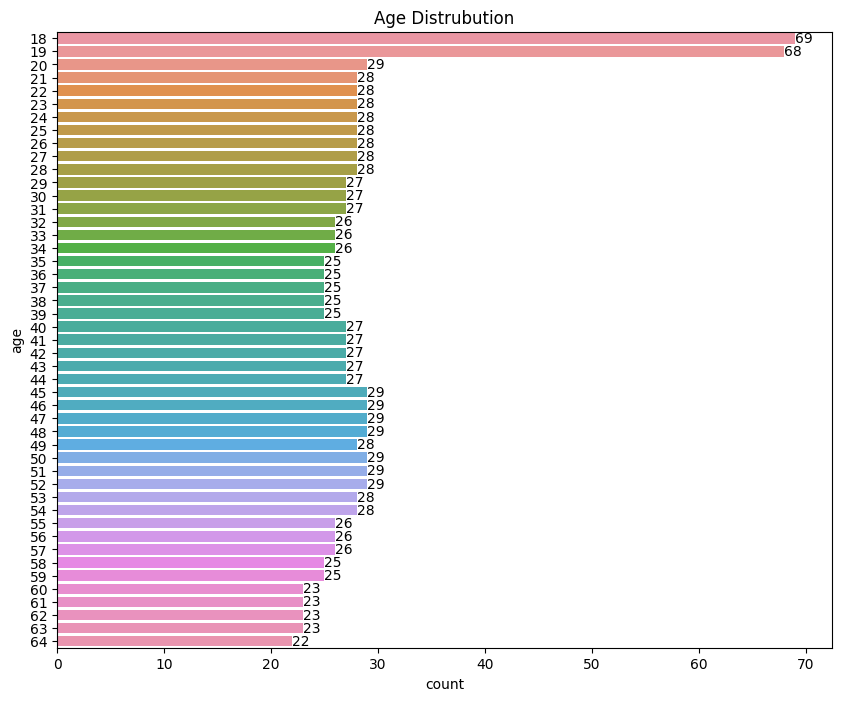

In [44]:
plt.figure(figsize=(10,8))
ax = sns.countplot(df, y='age')
ax.bar_label(ax.containers[0])
plt.title('Age Distrubution')

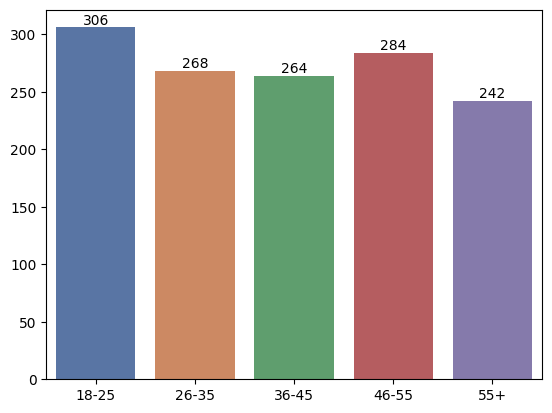

In [45]:
age_18_25 = df.age[(df.age >= 18) & (df.age <= 25)]
age_26_35 = df.age[(df.age >= 26) & (df.age <= 35)]
age_36_45 = df.age[(df.age >= 36) & (df.age <= 45)]
age_46_55 = df.age[(df.age >= 46) & (df.age <= 55)]
age_55above = df.age[df.age >= 55]

x_age = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),
     len(age_55above.values)]

ax = sns.barplot(data = df, x = x_age, y = y_age, palette='deep')
ax.bar_label(ax.containers[0])
plt.show()

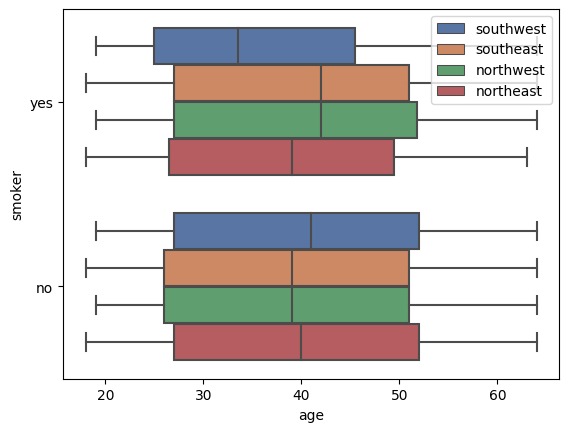

In [46]:
sns.boxplot(data=df, x='age', y='smoker',hue='region',palette='deep')
plt.legend(loc='upper right')

>Seaborn in fact has six variations of matplotlib’s `palette`, called `deep`, `muted`, `pastel`, `bright`, `dark`, and `colorblind`. These span a range of average luminance and saturation values:

## For BMI

<Axes: xlabel='bmi', ylabel='sex'>

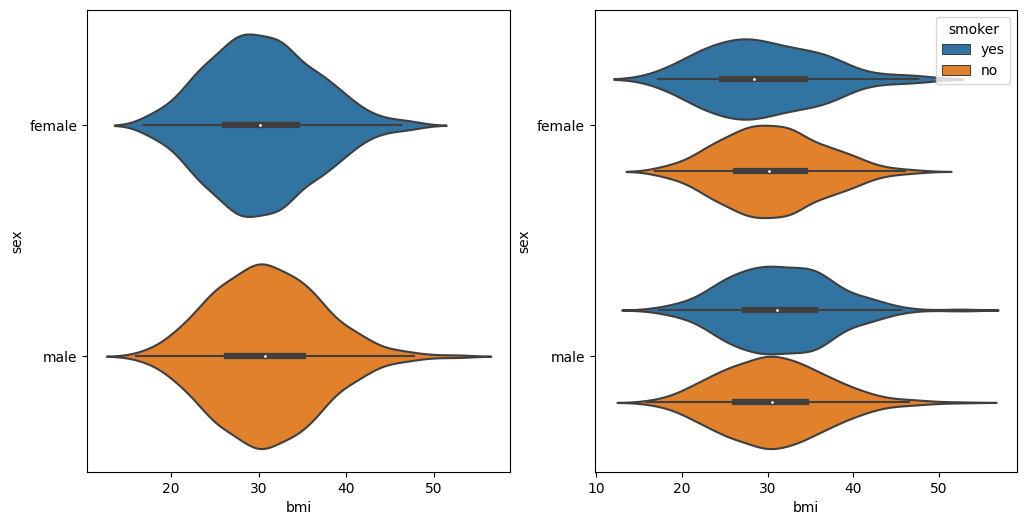

In [47]:
plt.figure(figsize=(12,6)) # figsize=(widht,height)
plt.subplot(1,2,1)
sns.violinplot(df, x='bmi', y='sex')
plt.subplot(1,2,2)
sns.violinplot(df, x='bmi', y='sex', hue='smoker')

<Axes: xlabel='bmi', ylabel='region'>

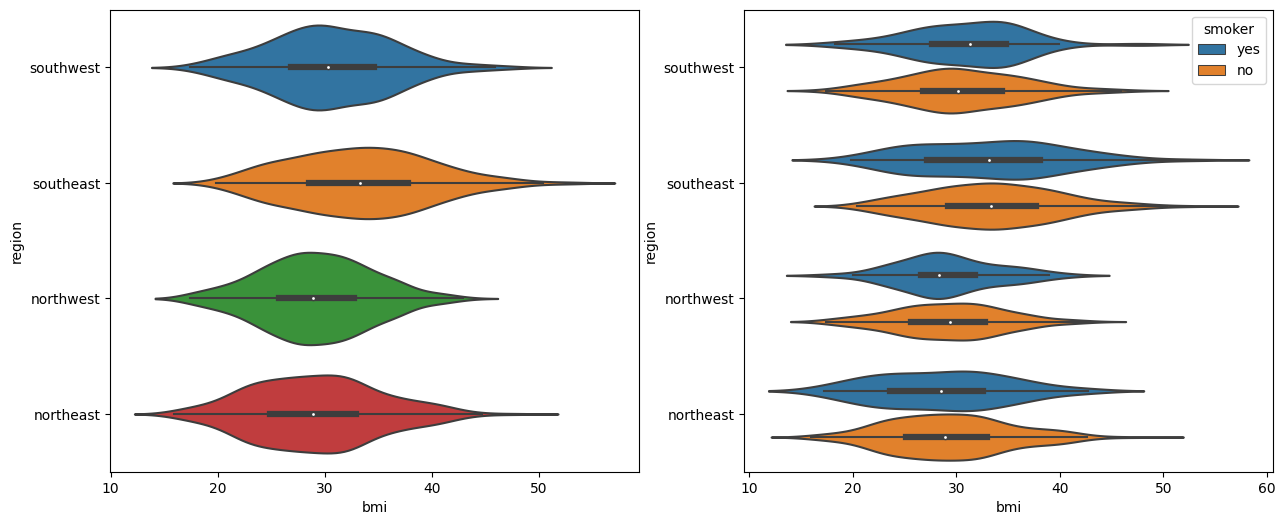

In [49]:
plt.figure(figsize=(15,6)) # figsize=(widht,height)
plt.subplot(1,2,1)
sns.violinplot(df, x='bmi', y='region')
plt.subplot(1,2,2)
sns.violinplot(df, x='bmi', y='region', hue='smoker')

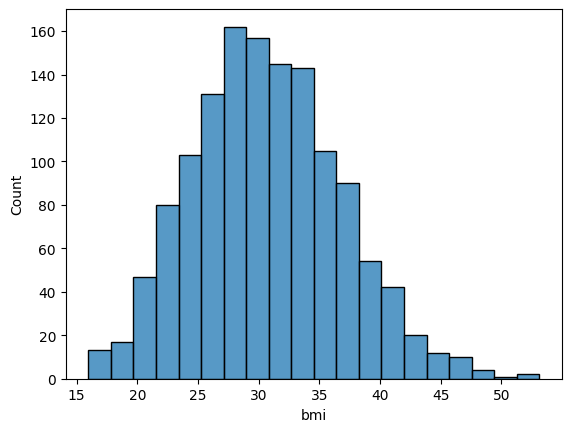

In [50]:

sns.histplot(df, x='bmi', bins=20, palette='deep')
plt.show()

Text(0.5, 1.0, 'Scatter plot of bmi and charges')

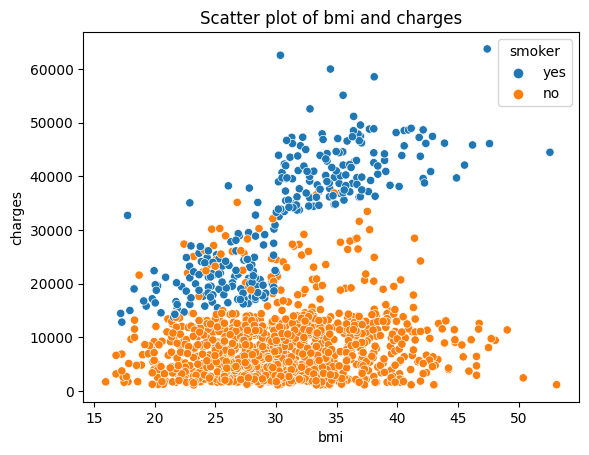

In [51]:
# plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,hue='smoker')
ax.set_title('Scatter plot of bmi and charges')

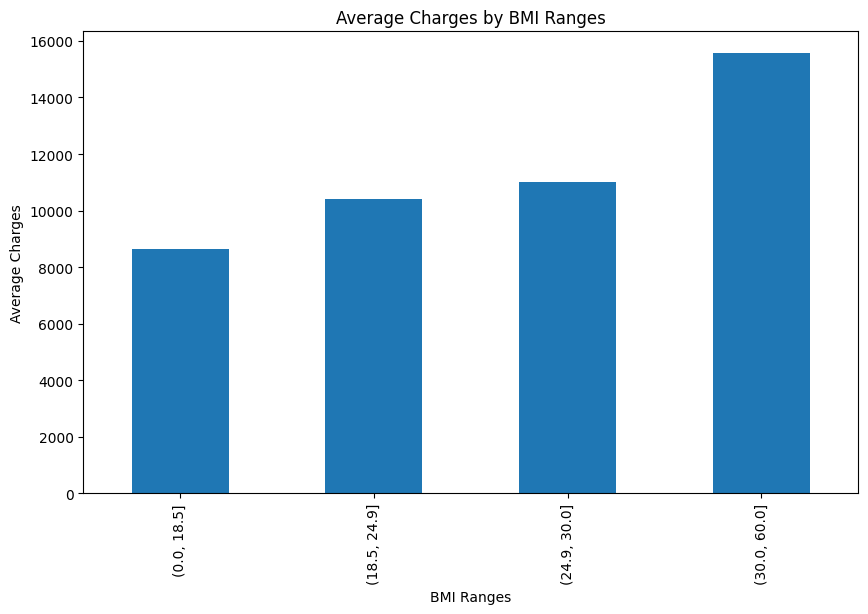

In [52]:
# Visualization : Bar plot of the average charges for different BMI ranges
bmi_ranges = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 30, 60])
avg_charges_by_bmi_ranges = df.groupby(bmi_ranges)['charges'].mean()
plt.figure(figsize=(10, 6))
avg_charges_by_bmi_ranges.plot(kind='bar')
plt.xlabel('BMI Ranges')
plt.ylabel('Average Charges')
plt.title('Average Charges by BMI Ranges')
plt.show()

## For Sex

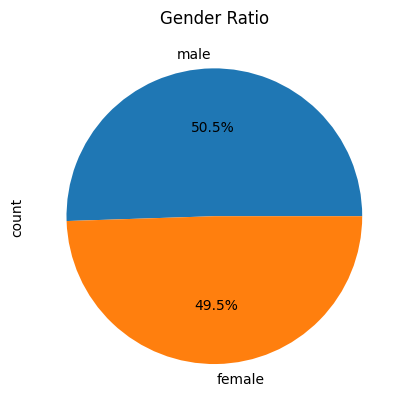

In [18]:
df.sex.value_counts().plot(kind='pie', autopct='%1.1f%%').set_title('Gender Ratio')
plt.show()

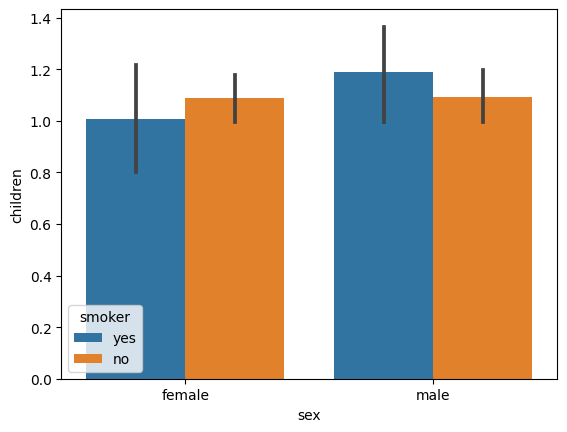

In [19]:
sns.barplot(df, x='sex', y='children', hue='smoker')
plt.show()

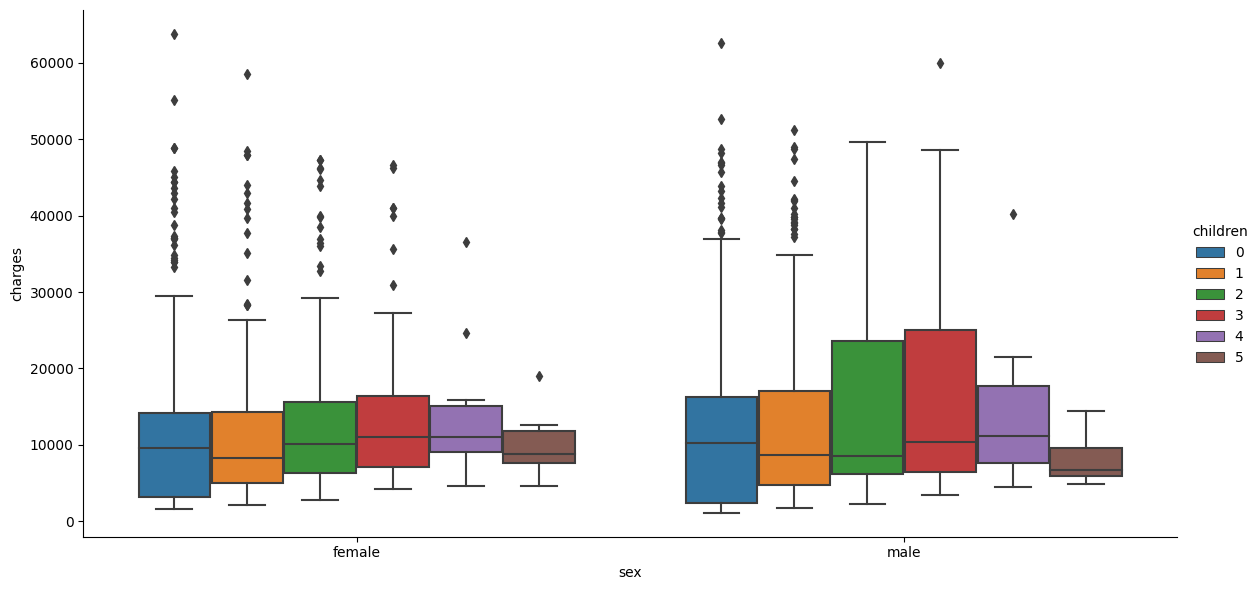

In [20]:
sns.catplot(x = 'sex', y = 'charges', hue = 'children', data = df, kind = 'box',
            height = 6, aspect = 2)
plt.show()

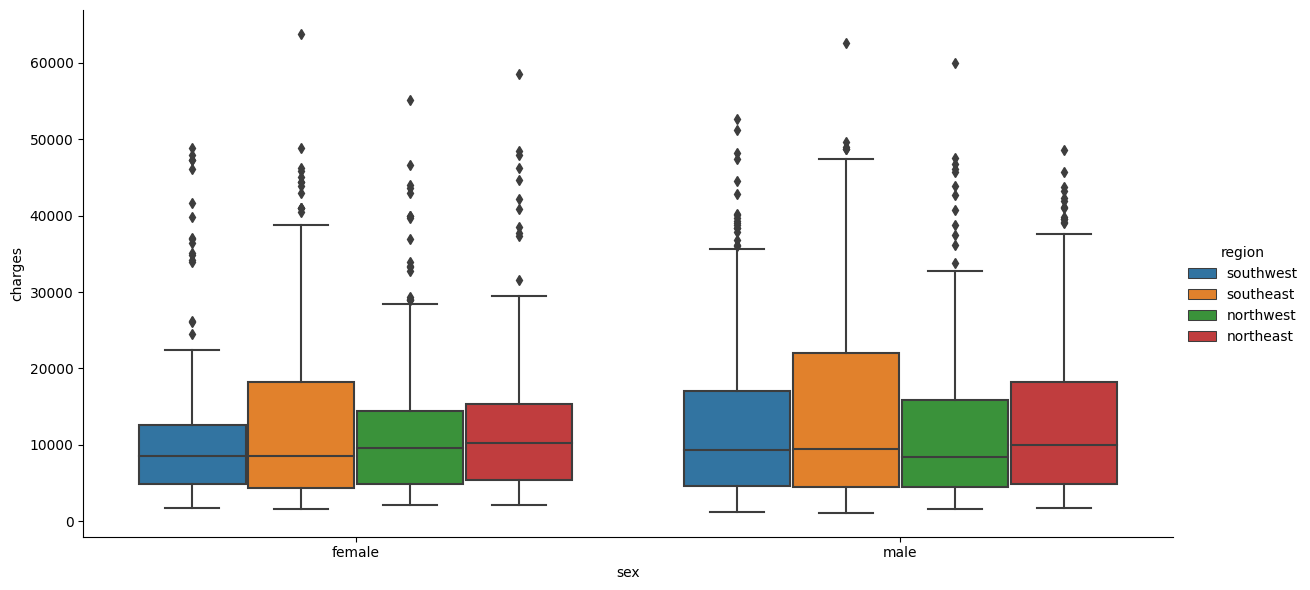

In [21]:
sns.catplot(x = 'sex', y = 'charges', hue = 'region', data = df, kind = 'box',
            height = 6, aspect = 2)
plt.show()

## For Smoker

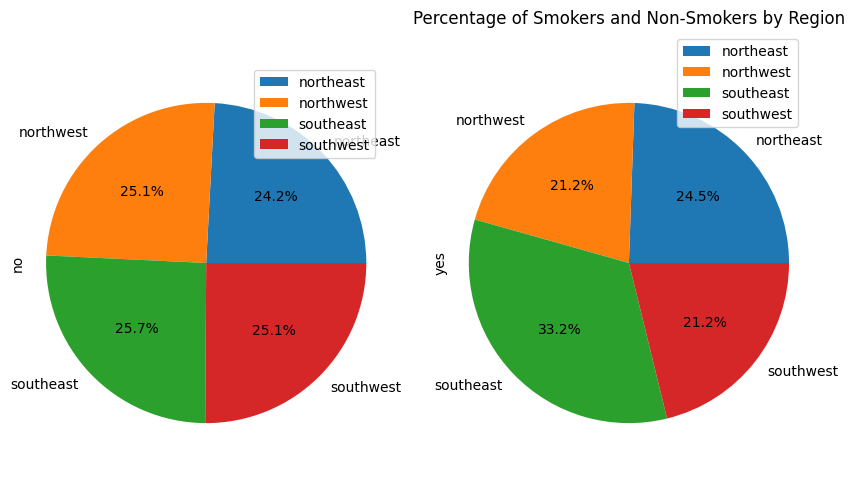

In [54]:
# Visualization : Pie chart of the percentage of smokers and non-smokers for each region
region_smoker_counts = df.groupby(['region', 'smoker']).size().unstack()
region_smoker_counts.plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%', subplots=True)
plt.legend(loc='upper right')
plt.title('Percentage of Smokers and Non-Smokers by Region')
plt.axis('equal')
plt.show()

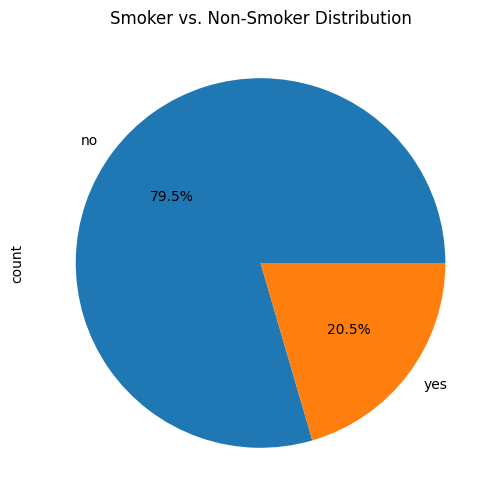

In [24]:
plt.figure(figsize=(8, 6))
df['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Smoker vs. Non-Smoker Distribution')
plt.show()

## For Region

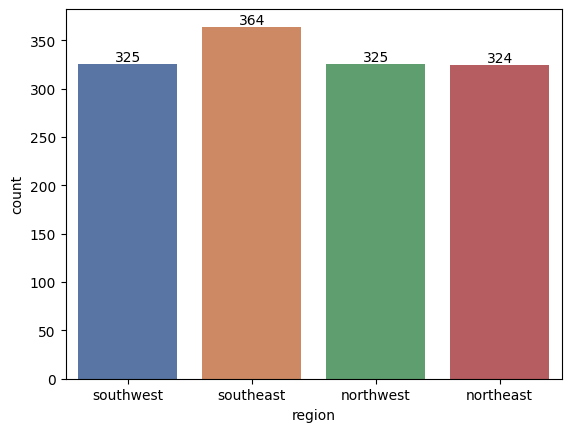

In [55]:
ax = sns.countplot(df, x='region',palette='deep')
ax.bar_label(ax.containers[0])
plt.show()

In [26]:
# df['region'].value_counts().plot(kind='pie',autopct='%1.2f%%')
# plt.show()

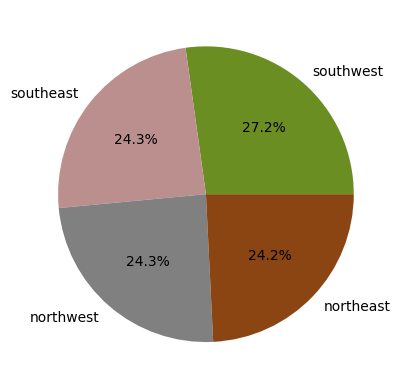

In [27]:
plt.pie(x=df['region'].value_counts(),labels=df['region'].unique(), 
        autopct='%1.1f%%',
        colors=['olivedrab', 'rosybrown', 'gray', 'saddlebrown'])
plt.show()

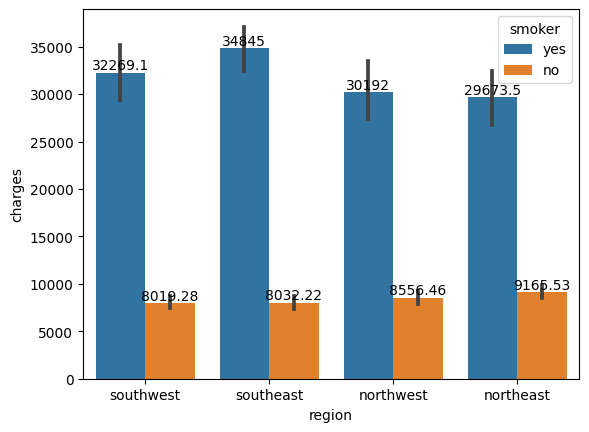

In [28]:
ax = sns.barplot(df,x='region',y='charges',hue='smoker')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

## For Children

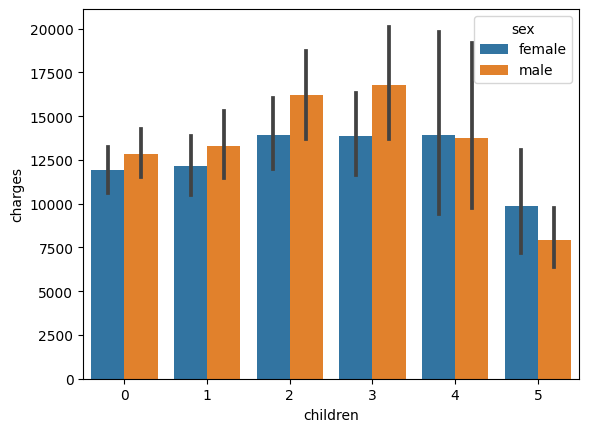

In [29]:
# sns.catplot(x = 'children', y = 'charges', col = 'sex', data = df, kind = 'bar')
sns.barplot(x = 'children', y = 'charges', hue = 'sex', data = df)
plt.show()

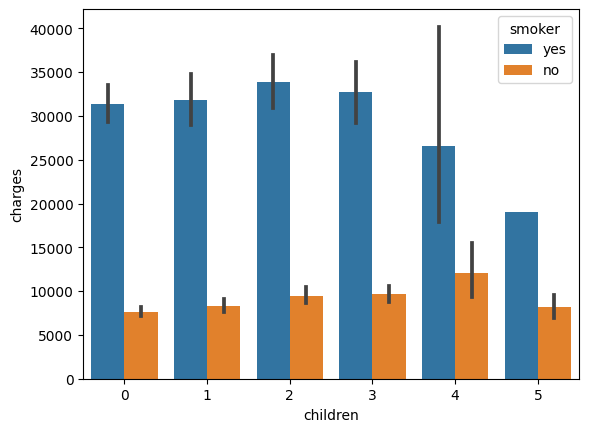

In [30]:
sns.barplot(x = 'children', y = 'charges', hue = 'smoker', data = df)

plt.show()

# 4. Data Preprocessing

In [60]:
##Converting objects labels into categorical
data = df.copy()
data[['sex', 'smoker', 'region']] = data[['sex', 'smoker', 'region']].astype('object')
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Lets categorize the object attributes
for the sex:

- 0: Female
- 1: Male

for the smoker:

- 0: no
- 1: yes

for the region:

- southwest: 3
- southeast: 2
- northwest: 1
- northeast: 0

In [61]:
from sklearn.calibration import LabelEncoder


for c in data.columns:
    if data[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(data[c].values))
        data[c] = lbl.transform(data[c].values)
        
        
display(data.head())

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Now we've done labeling lets see the how attributes effect the charges

- we see the most effect on the charges is the `smoker` with the `0.79`
- then after follows `age with (0.3) & bmi with (0.2)`

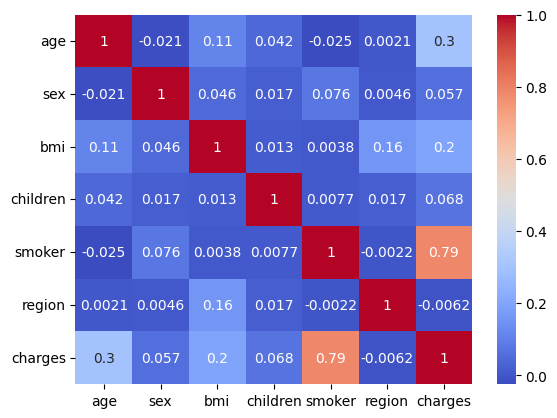

In [62]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

## Spliting the dataset

In [63]:
# Split data into features (X) and target (y)
X = data.drop(columns=['charges'],axis=1)
y = data['charges']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale the dataset by normalizing it (`Min-Max Scaling` or `Standard Scaling`)

In [64]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [65]:
def scores(y_true,y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_true, y_pred)

    return mae, mse, rmse, r_squared

models = pd.DataFrame({'Actual':y_test})
models.head()

,Actual
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180


# 5. Model Selection

## 1. Linear Regressor Model
---

LinearRegression fits a linear model with coefficients `w = (w1, …, wp)` to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [66]:
linear_reg_model= LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [68]:
y_pred = linear_reg_model.predict(X_test_scaled)
y_pred_lin = pd.DataFrame(y_pred)
MAE_li_reg= mean_absolute_error(y_test, y_pred)
MSE_li_reg = mean_squared_error(y_test, y_pred)
RMSE_li_reg =np.sqrt(MSE_li_reg)
pd.DataFrame([MAE_li_reg, MSE_li_reg, RMSE_li_reg], index=['MAE_li_reg', 'MSE_li_reg', 'RMSE_li_reg'], columns=['Metrics'])

,Metrics
MAE_li_reg,4.186509e+03
MSE_li_reg,3.363521e+07
RMSE_li_reg,5.799587e+03


In [70]:
models['Linear Reg'] = y_pred_lin
models.head()

,Actual,Linear Reg
764,9095.06825,NaN
887,5272.17580,NaN
890,29330.98315,NaN
1293,9301.89355,NaN
259,33750.29180,7537.068541


In [71]:
scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.84619871 0.89602595 0.851232   0.81184543 0.87584869]


In [72]:
r2_score(y_test, linear_reg_model.predict(X_test_scaled))

0.7833463107364537

## 2. Gradient Boosting Regressor
---

In [73]:

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}


In [74]:
Gradient_model = GradientBoostingRegressor(**params)

Gradient_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [75]:
mse = mean_squared_error(y_test, Gradient_model.predict(X_test_scaled))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 19037485.7236


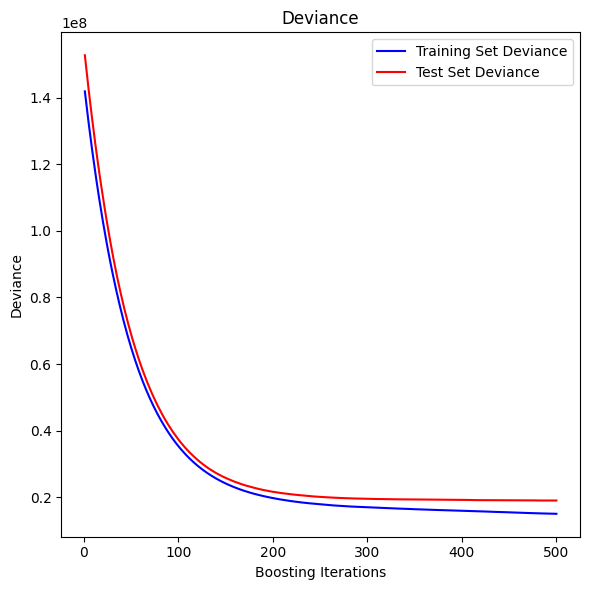

In [76]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(Gradient_model.staged_predict(X_test_scaled)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    Gradient_model.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [77]:
y_pred = Gradient_model.predict(X_test_scaled)
y_pred_gradient = pd.DataFrame(y_pred)
MAE_gradient= mean_absolute_error(y_test, y_pred)
MSE_gradient = mean_squared_error(y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], columns=['Metrics'])

,Metrics
MAE_gradient,2.439878e+03
MSE_gradient,1.903749e+07
RMSE_gradient,4.363197e+03


In [78]:
models['Gradient Boost Reg'] = y_pred_gradient
models.head()

,Actual,Linear Reg,Gradient Boost Reg
764,9095.06825,NaN,NaN
887,5272.17580,NaN,NaN
890,29330.98315,NaN,NaN
1293,9301.89355,NaN,NaN
259,33750.29180,7537.068541,8501.375739


In [79]:
scores = cross_val_score(Gradient_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.9142501  0.95724039 0.90431778 0.88981026 0.91854396]


In [80]:
r2_score(y_test, Gradient_model.predict(X_test_scaled))

0.8773742913020179

## 3. Decision Tree Regressor
---

In [81]:
tree_reg_model =DecisionTreeRegressor()
tree_reg_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [82]:
y_pred = tree_reg_model.predict(X_test_scaled)
y_pred_decision = pd.DataFrame(y_pred)
MAE_tree_reg= mean_absolute_error(y_test, y_pred)
MSE_tree_reg = mean_squared_error(y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
pd.DataFrame([MAE_tree_reg, MSE_tree_reg, RMSE_tree_reg], index=['MAE_tree_reg', 'MSE_tree_reg', 'RMSE_tree_reg'], columns=['Metrics'])

,Metrics
MAE_tree_reg,2.981013e+03
MSE_tree_reg,4.495026e+07
RMSE_tree_reg,6.704496e+03


In [83]:
models['Decision Tree Reg'] = y_pred_decision
models.head()

,Actual,Linear Reg,Gradient Boost Reg,Decision Tree Reg
764,9095.06825,NaN,NaN,NaN
887,5272.17580,NaN,NaN,NaN
890,29330.98315,NaN,NaN,NaN
1293,9301.89355,NaN,NaN,NaN
259,33750.29180,7537.068541,8501.375739,6551.7501


In [84]:
scores = cross_val_score(tree_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.85327865 0.86296864 0.79750449 0.79383474 0.883216  ]


In [85]:
r2_score(y_test, tree_reg_model.predict(X_test_scaled))

0.7104629387365968

In [86]:
 tree_reg_model.score(X_test_scaled, y_test)


0.7104629387365968

## 4. Random Forest Regressor
---

In [87]:
forest_reg_model =RandomForestRegressor()
forest_reg_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [94]:
y_pred = forest_reg_model.predict(X_test_scaled)
y_pred_ranfor = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])

,Metrics
MAE_forest_reg,2.505227e+03
MSE_forest_reg,2.162000e+07
RMSE_forest_reg,4.649731e+03


In [95]:
models['Random Forest Reg'] = y_pred_ranfor
models.head()

,Actual,Linear Reg,Gradient Boost Reg,Decision Tree Reg,Random Forest Reg
764,9095.06825,NaN,NaN,NaN,NaN
887,5272.17580,NaN,NaN,NaN,NaN
890,29330.98315,NaN,NaN,NaN,NaN
1293,9301.89355,NaN,NaN,NaN,NaN
259,33750.29180,7537.068541,8501.375739,6551.7501,7519.426943


In [90]:
scores = cross_val_score(forest_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.90372131 0.94944344 0.88798362 0.88214439 0.91379316]


In [96]:
r2_score(y_test, forest_reg_model.predict(X_test_scaled))


0.8607396109854104

In [97]:
models.shape

(268, 5)

In [98]:
models.isnull().sum()

Actual                  0
Linear Reg            216
Gradient Boost Reg    216
Decision Tree Reg     216
Random Forest Reg     216
dtype: int64